In [42]:
import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
import pyfolio as pf

/opt/anaconda3/envs/skydog/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


# 个股研究

本笔记分析个股的重要数据。

In [2]:
ticker='BABA'

In [44]:
#get data from yahoo finance
yfticker=yf.Ticker(ticker)
stock_info=yfticker.info
stcok_price=yfticker.history(start=dt.date(2000,1,1),auto_adjust=True)
benchmark_price=yf.Ticker('SPY').history(start=min(stcok_price.index),auto_adjust=True)

In [17]:
stock_info

{'zip': '311121',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 258578,
 'longBusinessSummary': "Alibaba Group Holding Limited, through its subsidiaries, provides technology infrastructure and marketing reach to merchants, brands, retailers, and other businesses to engage with their users and customers in the People's Republic of China and internationally. It operates through four segments: Core Commerce, Cloud Computing, Digital Media and Entertainment, and Innovation Initiatives and Others. The company operates Taobao Marketplace, a social commerce platform; Tmall, a third-party online and mobile commerce platform for brands and retailers; Alimama, a monetization platform; 1688.com and Alibaba.com, which are online wholesale marketplaces; AliExpress, a retail marketplace; Lazada, Trendyol, and Daraz that are e-commerce platforms; and Tmall Global and Kaola, which are import e-commerce platforms. It also operates Lingshoutong that connects FMCG manufacturers and their distribu

## 基本面数据

In [31]:

print('盈利能力指标')
print('Gross Margin: %.2f%%'%(100*stock_info['grossMargins']))
print('Operating Cashflow Margin: %.2f%%'%(100*stock_info['operatingCashflow']/stock_info['totalRevenue']))
print('Net Profit Margin: %.2f%%'%(100*stock_info['profitMargins']))
print('ROE: %.2f%%'%(100*stock_info['returnOnEquity']))

盈利能力指标
Gross Margin: 38.78%
Operating Cashflow Margin: 24.15%
Net Profit Margin: 15.30%
ROE: 11.25%


# 股价与收益率分析

Text(0.5, 1.0, 'Daily Return Histgram: 1840 days')

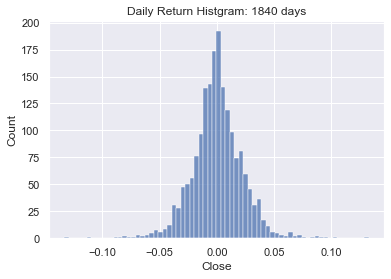

In [50]:
sns.set()
sns.histplot(data=stcok_price['Close'].pct_change())
plt.title('Daily Return Histgram: %i days'%(stcok_price['Close'].count()))

Start date,2014-09-22
End date,2022-01-07
Total months,87
,Backtest
Annual return,4.539%
Cumulative returns,38.258%
Annual volatility,35.273%
Sharpe ratio,0.30
Calmar ratio,0.07
Stability,0.69
Max drawdown,-64.697%


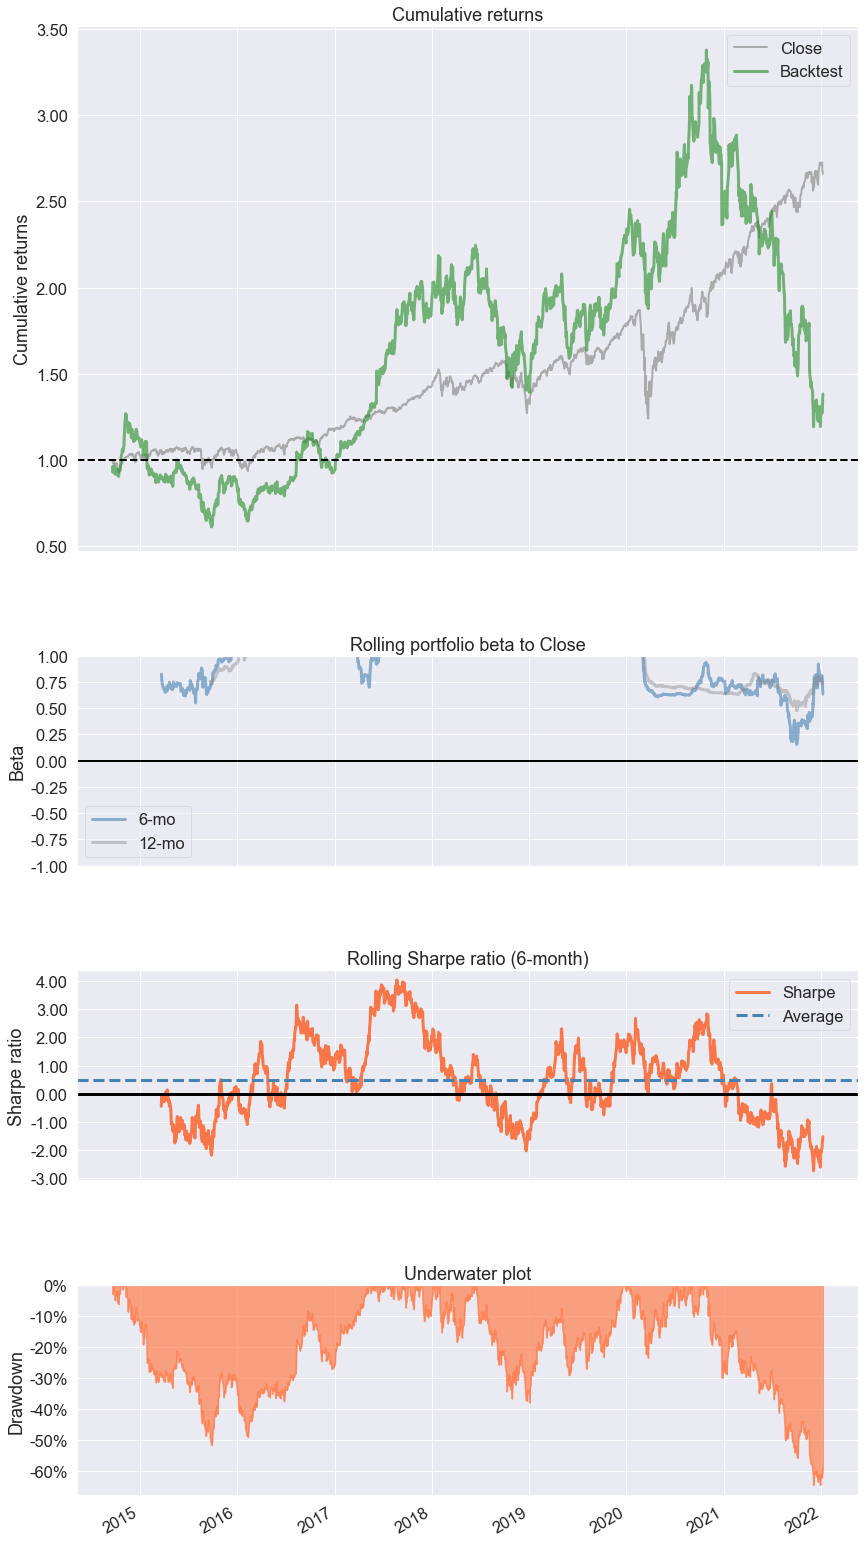

In [48]:
pf.create_simple_tear_sheet(stcok_price['Close'].pct_change().dropna(),
                            benchmark_rets=benchmark_price['Close'].pct_change().dropna())